In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
import os
os.listdir('./data_files_ml_engineer/')

['user_interests.csv',
 'user_assessment_scores.csv',
 'user_course_views.csv',
 'course_tags.csv']

In [41]:
data_dir = './data_files_ml_engineer/'
user_interests = pd.read_csv(os.path.join(data_dir, 'user_interests.csv'))
user_assessment_scores = pd.read_csv(os.path.join(data_dir, 'user_assessment_scores.csv'))
user_course_views = pd.read_csv(os.path.join(data_dir, 'user_course_views.csv'))
course_tags = pd.read_csv(os.path.join(data_dir, 'course_tags.csv'))

In [ ]:
# Data Exploration

In [42]:
user_interests.head()

,user_handle,interest_tag,date_followed
0,1,mvc-scaffolding,2017-06-27 16:26:52
1,1,mvc2,2017-06-27 16:26:52
2,1,mvc-html-helpers,2017-06-27 16:26:52
3,1,mvc4-ioc,2017-06-27 16:26:52
4,1,mvc-testing,2017-06-27 16:26:52


In [111]:
user_interests.nunique()

user_handle      10000
interest_tag       748
date_followed    12869
dtype: int64

In [43]:
user_assessment_scores.head()

,user_handle,assessment_tag,user_assessment_date,user_assessment_score
0,7487,angular-js,2017-08-11 19:03:38,134
1,7487,css,2017-08-11 20:09:56,38
2,7487,html5,2017-07-31 18:59:37,84
3,7487,java,2017-07-31 18:49:27,149
4,7487,javascript,2017-07-31 19:05:03,92


In [109]:
user_assessment_scores.nunique()

user_handle              3114
assessment_tag             54
user_assessment_date     6570
user_assessment_score     282
dtype: int64

In [44]:
user_course_views.head()

,user_handle,view_date,course_id,author_handle,level,view_time_seconds
0,1,2017-06-27,cpt-sp2010-web-designers-branding-intro,875,Beginner,3786
1,1,2017-06-28,cpt-sp2010-web-designers-branding-intro,875,Beginner,1098
2,1,2017-06-28,cpt-sp2010-web-designers-css,875,Intermediate,4406
3,1,2017-07-27,cpt-sp2010-web-designers-css,875,Intermediate,553
4,1,2017-09-12,aws-certified-solutions-architect-professional,281,Advanced,102


In [110]:
user_course_views.nunique()

user_handle           8760
view_date              212
course_id             5942
author_handle         1412
level                    3
view_time_seconds    11631
dtype: int64

In [45]:
course_tags.head()

,course_id,course_tags
0,12-principles-animation-toon-boom-harmony-1475,2d-animation
1,2d-racing-game-series-unity-5-1312,game-design
2,2d-racing-games-unity-volume-2-1286,game-art
3,2d-racing-games-unity-volume-2-1286,digital-painting
4,2d-racing-games-unity-volume-2-1286,image-editing


In [155]:
course_tags.shape, course_tags.nunique()

((11337, 2), course_id      5942
 course_tags     998
 dtype: int64)

In [ ]:
# Venn diagram of all the 3 sets

In [50]:
user_course_tags_set = set(user_interests.interest_tag.unique())

In [51]:
course_tags_set = set(course_tags.course_tags.unique())

In [54]:
user_assessment_tags_set = set(user_assessment_scores.assessment_tag.unique())

In [97]:
len(user_course_tags_set), len(course_tags_set), len(user_assessment_tags_set)

(748, 999, 54)

In [99]:
len(user_course_tags_set.difference(course_tags_set)), len(user_assessment_tags_set.difference(course_tags_set))

(157, 38)

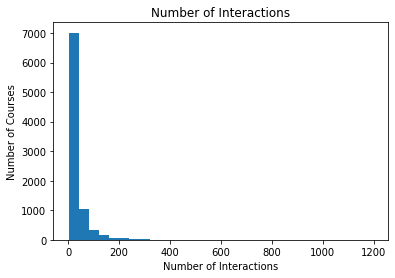

In [55]:
user_course_views_grouped_data = user_course_views.groupby('user_handle').count()['course_id']
plt.hist(user_course_views_grouped_data, bins=30);
plt.title('Number of Interactions');
plt.xlabel('Number of Interactions');
plt.ylabel('Number of Courses');

In [56]:
user_course_views_grouped_data.describe()

count    8760.000000
mean       28.451826
std        51.203602
min         1.000000
25%         4.000000
50%        12.000000
75%        32.000000
max      1197.000000
Name: course_id, dtype: float64

In [57]:
# 50% of individuals interact with 12 number of courses or fewer.
# The maximum number of user-course interactions by any 1 user is 1197

In [92]:
total_courses = user_course_views.course_id.nunique()
total_courses

5942

In [88]:
total_users = user_course_views.user_handle.nunique()
total_users

8760

In [86]:
course_interactions = user_course_views.groupby('course_id').count()['user_handle'].sort_values(ascending=False)[:20]

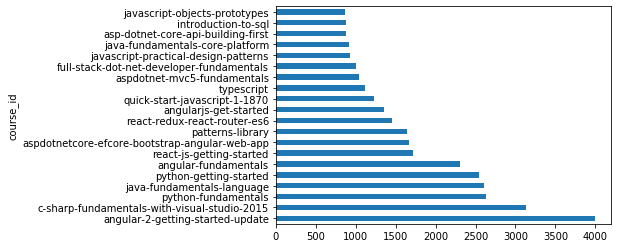

In [87]:
course_interactions.plot(kind='barh')

In [100]:
df = user_course_views.merge(user_assessment_scores, on ='user_handle')

In [101]:
df = df.merge(user_interests, on = 'user_handle')
df = df.merge(course_tags, on = 'course_id')

In [106]:
df.shape

(34590897, 12)

In [107]:
df.head()

,user_handle,view_date,course_id,author_handle,level,view_time_seconds,assessment_tag,user_assessment_date,user_assessment_score,interest_tag,date_followed,course_tags
0,2,2017-05-01,arnold-maya-fundamentals,273,Beginner,3277,photoshop,2016-09-23 16:59:45,139,zbrush,2017-07-03 04:37:31,3d-texturing
1,2,2017-05-01,arnold-maya-fundamentals,273,Beginner,3277,photoshop,2016-09-23 16:59:45,139,zbrush,2017-07-03 04:37:31,3d-rendering
2,2,2017-05-01,arnold-maya-fundamentals,273,Beginner,3277,photoshop,2016-09-23 16:59:45,139,zbrush,2017-07-03 04:37:31,3d-lighting
3,2,2017-05-01,arnold-maya-fundamentals,273,Beginner,3277,photoshop,2016-09-23 16:59:45,139,maya,2017-07-03 04:37:31,3d-texturing
4,2,2017-05-01,arnold-maya-fundamentals,273,Beginner,3277,photoshop,2016-09-23 16:59:45,139,maya,2017-07-03 04:37:31,3d-rendering


In [112]:
# Data Formulation

In [131]:
user_interests_tab = pd.crosstab(user_interests.user_handle, user_interests.interest_tag, dropna=False)
user_interests_tab.fillna(0, inplace=True)
user_interests_tab[user_interests_tab > 0] = 1
user_interests_tab = user_interests_tab.reset_index().rename_axis(None, axis=1)
user_interests_tab.head()

,user_handle,.net,.net-debugging,.net-distributed-systems,2d-animation,3d-animation,3d-coat,3d-dynamics,3d-lighting,3d-modeling,...,wpf,xamarin,xaml,xcode,xenapp,xendesktop,xml,xml-reporting,xunit,zbrush
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [159]:
user_interests_tab.describe()

,user_handle,.net,.net-debugging,.net-distributed-systems,2d-animation,3d-animation,3d-coat,3d-dynamics,3d-lighting,3d-modeling,...,wpf,xamarin,xaml,xcode,xenapp,xendesktop,xml,xml-reporting,xunit,zbrush
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.253900,0.010200,0.030100,0.025300,0.045900,0.001700,0.029700,0.038900,0.051100,...,0.022900,0.031800,0.012200,0.00380,0.006600,0.009400,0.021400,0.015400,0.003900,0.030700
std,2886.89568,0.435263,0.100484,0.170871,0.157043,0.209279,0.041198,0.169767,0.193366,0.220213,...,0.149592,0.175476,0.109783,0.06153,0.080976,0.096502,0.144721,0.123144,0.062331,0.172512
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5000.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7500.25000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10000.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
user_assessment_scores['user_assessment_score'] = scaler.fit_transform(user_assessment_scores[['user_assessment_score']])

In [157]:
user_assessment_scores_tab = user_assessment_scores.groupby(['user_handle', 'assessment_tag']) \
                                    ['user_assessment_score'].mean().unstack()
user_assessment_scores_tab.fillna(0, inplace=True)
user_assessment_scores_tab = user_assessment_scores_tab.reset_index().rename_axis(None, axis=1)
user_assessment_scores_tab.head()

,user_handle,3ds-max-environment-modeling,active-directory-administration,after-effects-cc,android,android-associate-developer,angular,angular-js,aspnet-mvc-5,autocad,...,revit-architecture-modeling-families,security-for-hackers-and-developers,sharepoint,solidworks-core-skills,the-scrum-framework,unity-game-development-core-skills,using-microsoft-office-2016,video-production,windows-server-management,zbrush-core-skills
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
user_assessment_scores_tab.describe()

,user_handle,3ds-max-environment-modeling,active-directory-administration,after-effects-cc,android,android-associate-developer,angular,angular-js,aspnet-mvc-5,autocad,...,revit-architecture-modeling-families,security-for-hackers-and-developers,sharepoint,solidworks-core-skills,the-scrum-framework,unity-game-development-core-skills,using-microsoft-office-2016,video-production,windows-server-management,zbrush-core-skills
count,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,...,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4978.378613,0.006053,0.010904,0.006360,0.015877,0.001972,0.014405,0.041944,0.045065,0.002261,...,0.000242,0.002039,0.007292,0.000323,0.025523,0.003674,0.005062,0.001295,0.000422,0.003154
std,2892.479772,0.056952,0.078084,0.057573,0.093296,0.031904,0.088901,0.143146,0.154449,0.037719,...,0.009645,0.031220,0.064752,0.011393,0.116585,0.044538,0.053713,0.024365,0.013890,0.040330
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2473.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4990.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7533.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9999.000000,0.855705,0.845638,0.771812,0.926174,0.812081,0.869128,0.906040,0.979866,0.808725,...,0.426174,0.731544,0.825503,0.459732,0.953020,0.738255,0.822148,0.557047,0.563758,0.805369


In [162]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
user_course_views['course_id'] = le.fit_transform(user_course_views.course_id)

In [166]:
user_course_views_tab = user_course_views.groupby(['user_handle','course_id'])['view_time_seconds'].sum().unstack()
user_course_views_tab.fillna(0, inplace=True)
user_course_views_tab = user_course_views_tab.reset_index().rename_axis(None, axis=1)
user_course_views_tab.head()

,user_handle,0,1,2,3,4,5,6,7,8,...,5932,5933,5934,5935,5936,5937,5938,5939,5940,5941
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
user_course_views_tab.describe()

,user_handle,0,1,2,3,4,5,6,7,8,...,5932,5933,5934,5935,5936,5937,5938,5939,5940,5941
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.00000,8760.000000
mean,4996.069406,0.007192,0.040639,0.025114,0.022945,2.618151,4.756621,0.029680,0.217466,0.850571,...,2.000799,0.286530,1.656963,1.814840,0.508333,1.000799,0.173973,0.157763,0.01758,0.588470
std,2886.674507,0.673114,2.841546,1.784499,1.246637,163.726048,212.168958,2.196071,13.532819,78.758856,...,186.027426,22.374519,108.570665,75.393999,32.806103,85.840474,12.707889,14.210718,1.16340,38.708626
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2497.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,4985.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,7500.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,10000.000000,63.000000,255.000000,153.000000,72.000000,13924.000000,13572.000000,195.000000,1156.000000,7371.000000,...,17411.000000,2041.000000,9210.000000,5139.000000,2969.000000,8013.000000,1118.000000,1329.000000,77.00000,2892.000000


In [172]:
cols_to_scale = list(user_course_views_tab.columns)[1:]

In [175]:
user_course_views_tab[cols_to_scale]=scaler.fit_transform(user_course_views_tab[cols_to_scale])

In [176]:
user_course_views_tab.describe()

,user_handle,0,1,2,3,4,5,6,7,8,...,5932,5933,5934,5935,5936,5937,5938,5939,5940,5941
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4996.069406,0.000114,0.000159,0.000164,0.000319,0.000188,0.000350,0.000152,0.000188,0.000115,...,0.000115,0.000140,0.000180,0.000353,0.000171,0.000125,0.000156,0.000119,0.000228,0.000203
std,2886.674507,0.010684,0.011143,0.011663,0.017314,0.011759,0.015633,0.011262,0.011707,0.010685,...,0.010684,0.010963,0.011788,0.014671,0.011050,0.010713,0.011367,0.010693,0.015109,0.013385
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2497.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4985.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7500.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [179]:
aggregared_df = user_interests_tab.copy()
aggregared_df = aggregared_df.merge(user_course_views_tab, on = 'user_handle', how = 'left') 
aggregared_df = aggregared_df.merge(user_assessment_scores_tab, on = 'user_handle', how = 'left') 


In [180]:
aggregared_df.describe()

,user_handle,.net,.net-debugging,.net-distributed-systems,2d-animation,3d-animation,3d-coat,3d-dynamics,3d-lighting,3d-modeling,...,revit-architecture-modeling-families,security-for-hackers-and-developers,sharepoint_y,solidworks-core-skills,the-scrum-framework,unity-game-development-core-skills,using-microsoft-office-2016,video-production,windows-server-management,zbrush-core-skills
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,5000.50000,0.253900,0.010200,0.030100,0.025300,0.045900,0.001700,0.029700,0.038900,0.051100,...,0.000242,0.002039,0.007292,0.000323,0.025523,0.003674,0.005062,0.001295,0.000422,0.003154
std,2886.89568,0.435263,0.100484,0.170871,0.157043,0.209279,0.041198,0.169767,0.193366,0.220213,...,0.009645,0.031220,0.064752,0.011393,0.116585,0.044538,0.053713,0.024365,0.013890,0.040330
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5000.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7500.25000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10000.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.426174,0.731544,0.825503,0.459732,0.953020,0.738255,0.822148,0.557047,0.563758,0.805369


In [188]:
aggregared_df.fillna(0, inplace=True)

In [182]:
aggregared_df.shape, aggregared_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Columns: 6745 entries, user_handle to zbrush-core-skills
dtypes: float64(5996), int64(749)
memory usage: 514.7 MB


((10000, 6745), None)

In [183]:
# Applying SVD

In [189]:
import scipy
user,singular,features = scipy.linalg.svd(aggregared_df)

In [ ]:
# Similar Users

In [203]:
def find_similar_users(user_id, user_item=user, number = 10):
    '''
    INPUT:
    user_id - (int) a user_id
    user - (pandas dataframe) matrix of users:
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    
    similarity = []
    for user in range(1, user_item.shape[0]+1):
        sim = np.dot(user_item.loc[user_id], user_item.loc[user])
        similarity.append((user, sim))
    
    # sort by similarity
    similarity.sort(key=lambda x: x[1], reverse=True)
    
    # create list of just the ids
    most_similar_users = [tup[0] for tup in similarity]
    
    # remove the own user's id
    most_similar_users.remove(user_id)
       
    return most_similar_users[:10]

In [204]:
user_matrix = pd.DataFrame(user)
user_matrix.index = aggregared_df['user_handle']

In [236]:
find_similar_users(1, user_matrix, 10)

[3228, 7859, 8061, 3512, 8589, 729, 753, 258, 526, 1159]

In [238]:
from sklearn.metrics.pairwise import cosine_similarity
user_sim_matrix = cosine_similarity(user_matrix)

In [239]:
user_sim_matrix = pd.DataFrame(user_sim_matrix, columns=list(aggregared_df['user_handle']))

In [240]:
user_sim_matrix['user_handle'] = aggregared_df['user_handle']
user_sim_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 10001 entries, 1 to user_handle
dtypes: float64(10000), int64(1)
memory usage: 763.0 MB


In [241]:
user_sim_matrix.head()

,1,2,3,4,5,6,7,8,9,10,...,9992,9993,9994,9995,9996,9997,9998,9999,10000,user_handle
0,1.000000e+00,-2.683693e-17,-5.017623e-17,1.364014e-17,4.575560e-17,1.440846e-16,-7.628907e-18,2.438821e-18,2.434019e-17,1.790649e-17,...,2.046240e-17,1.769225e-17,-5.508385e-17,1.104423e-16,-4.343135e-18,3.221817e-17,-4.473111e-17,-5.498839e-18,-2.540557e-17,1
1,-2.683693e-17,1.000000e+00,-1.842369e-17,5.086420e-17,1.504556e-18,3.364036e-19,-2.996516e-17,-1.198372e-17,-1.226320e-17,3.722995e-17,...,-1.391984e-18,-2.167244e-17,2.035523e-17,9.407620e-18,8.569828e-19,-1.361053e-18,-3.496052e-18,1.639769e-18,-1.070556e-17,2
2,-5.017623e-17,-1.842369e-17,1.000000e+00,-2.597748e-16,4.729880e-17,-2.656295e-17,4.830121e-17,-1.203464e-17,2.832393e-17,-6.128453e-17,...,4.943962e-17,-6.967032e-17,-3.122502e-17,3.220080e-17,-4.076600e-17,2.190088e-17,6.028164e-17,5.637851e-18,1.165517e-17,3
3,1.364014e-17,5.086420e-17,-2.597748e-16,1.000000e+00,2.245951e-17,-1.078781e-17,5.258381e-18,-5.421011e-18,4.130810e-17,-6.559423e-18,...,-2.797242e-17,-1.881006e-17,-1.084202e-17,-1.027282e-17,-1.647987e-17,1.908196e-17,9.974660e-18,-4.770490e-18,4.824700e-18,4
4,4.575560e-17,1.504556e-18,4.729880e-17,2.245951e-17,1.000000e+00,8.959206e-18,-4.914673e-18,-8.648993e-18,-2.690430e-17,-1.286777e-16,...,2.051975e-17,9.618389e-17,1.953865e-18,1.324439e-17,-1.809640e-17,-5.646962e-17,5.313695e-18,2.459472e-18,2.256221e-17,5


In [242]:
user_sim_matrix.shape

(10000, 10001)

In [235]:
user_sim_matrix.to_csv('User_Similarity.csv', index = False)